In [14]:
clc
clear
close all

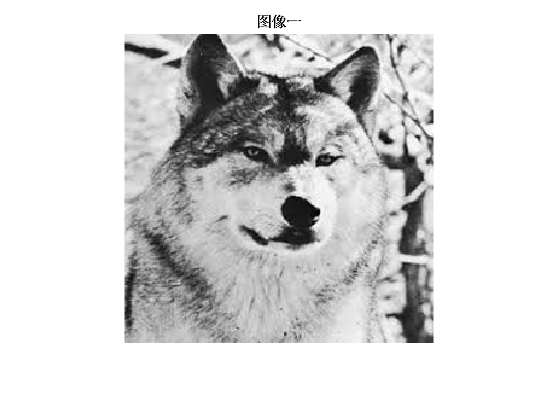

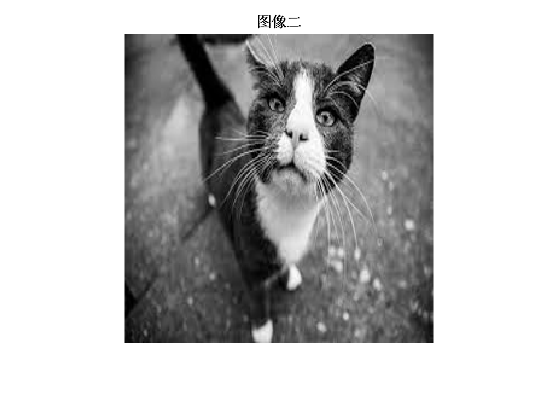

In [15]:
img1 = imread('img/image1.jpg');
img2 = imread('img/image3.jpg');
img1 = imresize(img1, [256 256]);
img2 = imresize(img2, [256 256]);
imwrite(img1,'img1_1.jpg');
imwrite(img2,'img2_1.jpg');
figure
% subplot(1,2,1)
imshow(img1)
title("图像一")

figure
% subplot(1,2,2)
imshow(img2)
title("图像二")

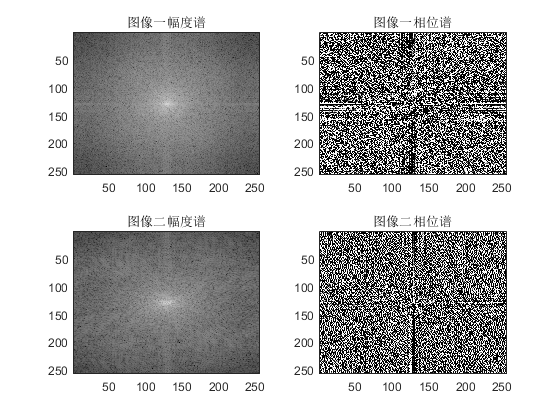

In [16]:

% 计算频域幅度谱和相位谱
freq1 = fft2(img1);
freq2 = fft2(img2);
freq1 = fftshift(freq1);
freq2 = fftshift(freq2);
% freq1_magnitude = abs(freq1);
% freq2_magnitude = abs(freq2);
freq1_magnitude = log(1 + abs(freq1));
freq2_magnitude = log(1 + abs(freq2));
freq1_magnitude = mat2gray(freq1_magnitude);
freq2_magnitude = mat2gray(freq2_magnitude);
freq1_phase = angle(freq1);
freq2_phase = angle(freq2);

figure
subplot(2,2,1)
imagesc(freq1_magnitude);
subtitle("图像一幅度谱")
subplot(2,2,2)
imagesc(freq1_phase);
subtitle("图像一相位谱")
subplot(2,2,3)
imagesc(freq2_magnitude);
subtitle("图像二幅度谱")
subplot(2,2,4)
imagesc(freq2_phase);
subtitle("图像二相位谱")

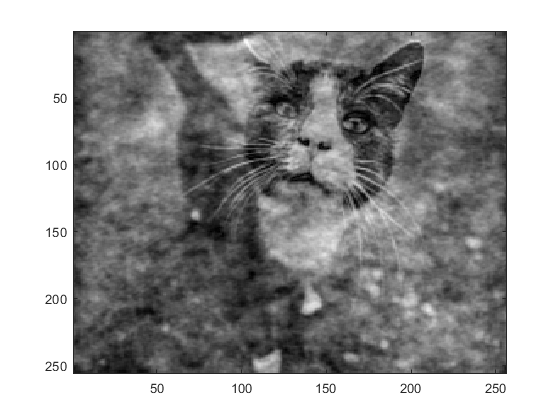

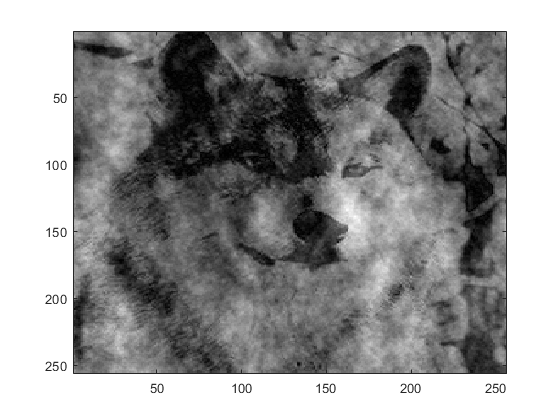

In [17]:
freq1_2 = abs(freq1).*exp(1j*freq2_phase);
freq2_1 = abs(freq2).*exp(1j*freq1_phase);
img1_2 = ifft2(ifftshift(freq1_2));
img2_1 =  ifft2(ifftshift(freq2_1));
img1_2 = mat2gray(abs(img1_2));
img2_1 = mat2gray(abs(img2_1));

imwrite(img1_2,'img1_2.jpg');
imwrite(img2_1,'img2_2.jpg');

figure
imagesc(abs(img1_2))
figure
imagesc(abs(img2_1));